In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Heart Failure Clinical Records

[link to data source](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

1. SEX: 0-woman, 1-man. 
2. TIME: duration in days between hospitalisation and DEATH_EVENT.


In [38]:
def read_file(path):
    df = pd.read_csv(path)
    return df

def devide_num_cat(data):
    hfcr_categorial_values = data[['anaemia', 'diabetes', 'high_blood_pressure','sex', 'smoking','DEATH_EVENT']]
    hfcr_numerical_values = data[['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]
    
    return hfcr_categorial_values, hfcr_numerical_values


data = read_file('heart_failure_clinical_records_dataset.csv')
cat, num = devide_num_cat(data)
num.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


### Death rate

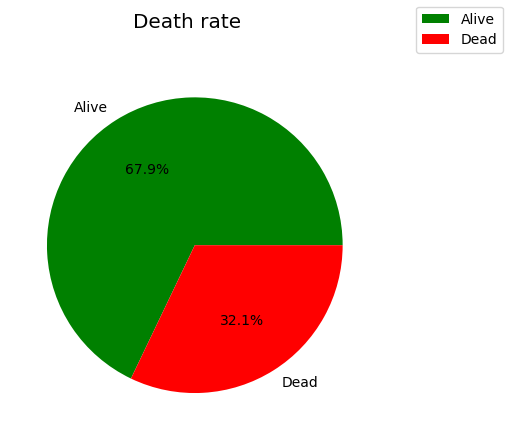

In [26]:
labels = ['Alive','Dead']

#counting how many times the event caused patient death
death_counts = cat['DEATH_EVENT'].value_counts()

#displaying the graph representing the death rate of heart failure 
fig, ax = plt.subplots()
ax.pie(death_counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
fig.legend()
fig.suptitle('Death rate', fontsize='x-large')

plt.show()


### Number of Men and Women in specified age groups where the problem occurred

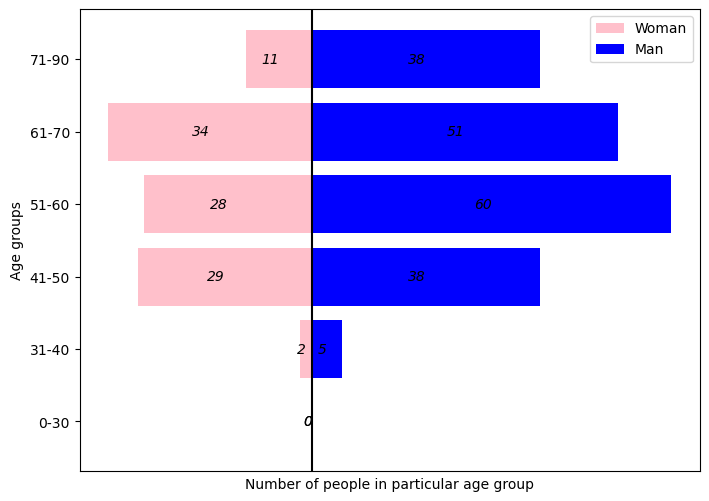

In [92]:
age_groups = ['0-30','31-40', '41-50', '51-60', '61-70', '71-90']
bins = [0, 30, 40, 50, 60, 70, 90]

#assigning patients into particular age_group
data['age_group'] = pd.cut(data['age'], bins=bins, labels=age_groups)

#devide man and woman group
woman = data[data['sex'] == 0]
man = data[data['sex'] == 1]

#couting the number of woman and man in each age range
#reindex method for setting values in proper order
woman_count = woman['age_group'].value_counts().reindex(age_groups)
man_count = man['age_group'].value_counts().reindex(age_groups)

fig, ax = plt.subplots(figsize=(8, 6))

#creating two subplots
ax.barh(age_groups, -woman_count, color='pink', label='Woman')
ax.barh(age_groups, man_count, color='blue', label='Man')

#adding the number of people in parcitular age_group into the 
for i in range(len(age_groups)):
    ax.text(-woman_count.iloc[i] * 0.5, i, str(woman_count.iloc[i]), ha='right', va='center', fontstyle='italic')
    ax.text(man_count.iloc[i] * 0.5, i, str(man_count.iloc[i]), ha='right', va='center', fontstyle='italic')

#black line in the middle and deteling xticks numbers 
ax.axvline(0, color='black', linewidth=1.5)
ax.set_xticks([])

plt.xlabel('Number of people in particular age group')
plt.ylabel('Age groups')
plt.legend()
plt.show()


### Plots representing legitimate and observerd level of particular substations. 

Healthy, normal values. 

**CPK** 10 - 120 mcg/L\
**Ejection fraction** 50 - 70 %\
**Platelets** 150,000 - 450,000\
**serum_creatinine** 0.7 - 1.3 mg/dL\
**serum_sodium** 135 - 145 mEq/L\ 


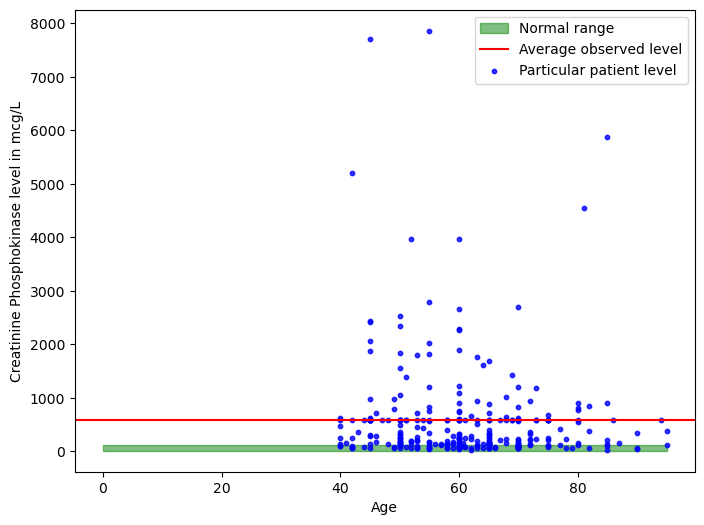

In [107]:
#CPK
average_observed_lvl = num['creatinine_phosphokinase'].mean()


fig, ax = plt.subplots(figsize=(8, 6))

#excepted range of CPK level of healthy adult 
ax.fill_betweenx(y=[10, 120], x1=0,x2= num['age'].max(), color='green', alpha=0.5, label= 'Normal range')


#average CPK lvl of patient with heart failure record 
ax.axhline(y=average_observed_lvl, color='red', linewidth=1.5, label='Average observed level')

sorted_data = data.sort_values(by='age')
ax.scatter(sorted_data['age'], sorted_data['creatinine_phosphokinase'], color = 'blue', 
           label='Particular patient level', alpha=0.8, s=10)



plt.xlabel('Age')
plt.ylabel('Creatinine Phosphokinase level in mcg/L')
plt.legend()
plt.show()



As we can conclude from the plot above, level of Creatinine Phosphokinase isn't directly associated with age. 
Moreover most of the patients include in the range between 0 and average level. Only few have normal healthy CPK result.
